## Python Excercise : Imbalance Classification

## 1. Data

Dataset Description:
1. Dataset :white_wine.csv
2. Imbalance target : wine quality
    - Positive class : quality > 6 (18.9%)
    - Negative class :quality <= 6 (81.1%)
3. Feature : Density and Alcohol

Task:
1. Do Modeling without polynomial features,
2. Check : recall, precision and f1-score
3. Do Modeling without polynomial features
4. Check L recall, precision and f1-score

In [32]:
import pandas as pd
import numpy as np

import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report

In [2]:
df =pd.read_csv('data/white_wine.csv')
good_percentage = df[df['quality']>6].shape[0]/df.shape[0]*100
bad_percentage = 100-good_percentage
print(good_percentage,bad_percentage)

18.846153846153847 81.15384615384616


In [5]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...
515,6.1,0.31,0.26,2.2,0.051,28.0,167.0,0.9926,3.37,0.47,10.4,6.0
516,6.8,0.18,0.37,1.6,0.055,47.0,154.0,0.9934,3.08,0.45,9.1,5.0
517,7.4,0.15,0.42,1.7,0.045,49.0,154.0,0.9920,3.00,0.60,10.4,6.0
518,5.9,0.13,0.28,1.9,0.050,20.0,78.0,0.9918,3.43,0.64,10.8,6.0


### Split Data

In [12]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      1
sulphates               1
alcohol                 1
quality                 1
dtype: int64

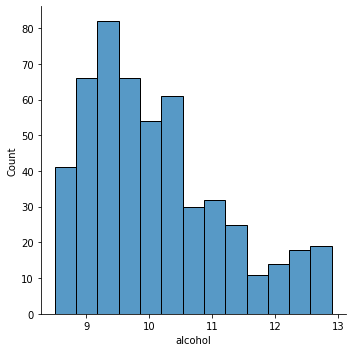

In [13]:
sns.displot(df['alcohol'])

In [23]:
df['alcohol'].fillna(df['alcohol'].median(), inplace=True)

C:\Users\62812\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='quality', ylabel='Density'>

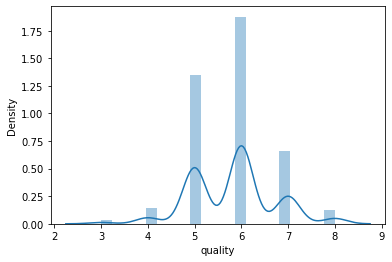

In [27]:
sns.distplot(df['quality'])

In [29]:
df['quality'].fillna(df['quality'].median(), inplace=True)

In [30]:
x = df[['density','alcohol']]
y = np.where(df['quality']>6,1,0)
x_train,x_test,y_train,y_test = train_test_split(
    x,
    y,
    stratify = y,
    test_size=0.3,
    random_state=2020
)

### Logreg without polynomial

In [31]:
logreg = LogisticRegression()
logreg.fit(x_train,y_train)

LogisticRegression()

In [35]:
y_pred = logreg.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       127
           1       0.79      0.38      0.51        29

    accuracy                           0.87       156
   macro avg       0.83      0.68      0.72       156
weighted avg       0.86      0.87      0.85       156



### Logreg with Polynomial

In [36]:
poly = PolynomialFeatures(degree=3, interaction_only=False, include_bias=False)
poly.fit(x_train)

x_train_poly = poly.transform(x_train)
x_test_poly = poly.transform(x_test)

In [37]:
logreg = LogisticRegression()
logreg.fit(x_train_poly,y_train)

LogisticRegression()

In [39]:
y_pred = logreg.predict(x_test_poly)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       127
           1       1.00      0.79      0.88        29

    accuracy                           0.96       156
   macro avg       0.98      0.90      0.93       156
weighted avg       0.96      0.96      0.96       156



### Resampling & Penalized Model

Analyze data bankloan.csv
1. Build a logistics regression model
    - Target : default
    - Features : employ, debtinc, credebt, othdebt
2. Explore the class distribution
3. Random state 2020, stratified training 60% validation 20% testing 2-%
4. Modeling evaluate by f1 score:
    - Logistic regression without any treatment
    - Logistic regression that optimized by the threshold
    - Logistic regression with random undersampling
    - Penalized logistic regression

In [3]:
# pip install imblearn

In [4]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report, f1_score

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import  matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('data/bankloan.csv')
df

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1
1,27,1,10,6,31,17.3,1.362202,4.000798,0
2,40,1,15,14,55,5.5,0.856075,2.168925,0
3,41,1,15,14,120,2.9,2.658720,0.821280,0
4,24,2,2,0,28,17.3,1.787436,3.056564,1
...,...,...,...,...,...,...,...,...,...
695,36,2,6,15,27,4.6,0.262062,0.979938,1
696,29,2,6,4,21,11.5,0.369495,2.045505,0
697,33,1,15,3,32,7.6,0.491264,1.940736,0
698,45,1,19,22,77,8.4,2.302608,4.165392,0


In [6]:
df['default'].value_counts()/df.shape[0]

0    0.738571
1    0.261429
Name: default, dtype: float64

In [7]:
x = df[['employ', 'debtinc', 'creddebt', 'othdebt']]
y = df['default']

x_trainval, x_test, y_trainval,y_test = train_test_split(
    x,
    y,
    stratify=y,
    test_size=0.2,
    random_state=2020
)

In [8]:
x_train, x_val, y_train,y_val = train_test_split(
    x_trainval,
    y_trainval,
    stratify=y_trainval,
    test_size=0.2,
    random_state=2020
)

### Logreg without any treatment

In [9]:
logreg = LogisticRegression()
logreg.fit(x_train,y_train)

LogisticRegression()

In [10]:
y_pred = logreg.predict(x_val)
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.92      0.87        83
           1       0.67      0.48      0.56        29

    accuracy                           0.80       112
   macro avg       0.75      0.70      0.72       112
weighted avg       0.79      0.80      0.79       112



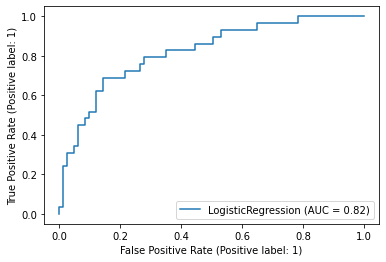

In [11]:
plot_roc_curve(logreg,x_val,y_val)

### Logreg optimized threshold 

In [12]:
th_val = [i/100 for i in range(20,61)]
score = 0
score_list = []

for i in th_val:
#     perhitungan score
    y_prob = logreg.predict_proba(x_val)[:,1]
    y_pred = np.where(y_prob>i, 1,0)
    score_temp = f1_score(y_val,y_pred)
    
#   penyimpanan hasil score
    score_list.append(score_temp)
    
    if score_temp > score:
        score = score_temp
        best_result = i
        
print(score,best_result)

0.6451612903225807 0.37


Text(0, 0.5, 'score')

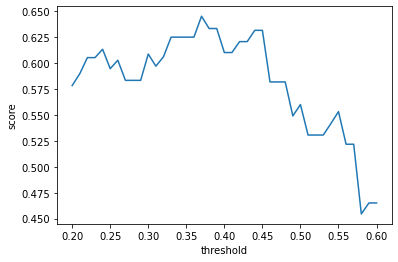

In [13]:
sns.lineplot(th_val, score_list)
plt.xlabel('threshold')
plt.ylabel('score')

### Logreg with random undersampling

In [14]:
rus = RandomUnderSampler()
x_under, y_under = rus.fit_resample(x_train, y_train)

In [15]:
len(y_under)

234

In [16]:
len(y_train)

448

In [17]:
logreg_rus = LogisticRegression()
logreg_rus.fit(x_under, y_under)

LogisticRegression()

In [18]:
y_pred = logreg_rus.predict(x_val)
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.73      0.81        83
           1       0.50      0.76      0.60        29

    accuracy                           0.74       112
   macro avg       0.70      0.75      0.71       112
weighted avg       0.79      0.74      0.75       112



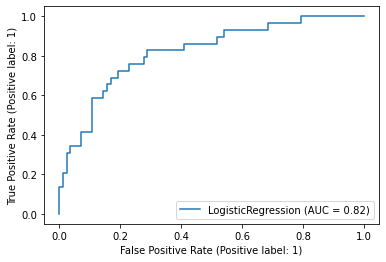

In [19]:
plot_roc_curve(logreg_rus,x_val,y_val)

### Logistic with Panalized

In [20]:
model_panalized = LogisticRegression(class_weight='balanced')
model_panalized.fit(x_train,y_train)

LogisticRegression(class_weight='balanced')

In [21]:
y_pred = model_panalized.predict(x_val)
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.72      0.80        83
           1       0.49      0.76      0.59        29

    accuracy                           0.73       112
   macro avg       0.69      0.74      0.70       112
weighted avg       0.79      0.73      0.75       112



**Performa Final Model : Logreg optimized threshold**

In [22]:
model = LogisticRegression()
model.fit(x_trainval,y_trainval)

LogisticRegression()

In [24]:
y_prob = model.predict_proba(x_test)[:,1]
y_pred = np.where(y_prob>best_result,1,0)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84       103
           1       0.56      0.62      0.59        37

    accuracy                           0.77       140
   macro avg       0.71      0.72      0.72       140
weighted avg       0.78      0.77      0.78       140



Terjadi penurunan dari training dengan val, dengan training di akhir.. karena data tidak stabil dan data tidak terlalu banyak